# 2.2 Programmatic data wrangling with Python and Pandas

<div class="alert alert-block alert-warning">
    <b>Learning outcomes:</b>
    <br>
    <ul>
        <li>Integrate and apply methods from the core data analysis libraries of Numpy, Pandas and Matplotlib to investigate and manipulate source data.</li>
    </ul>
</div>

---

## 2.2.1 Investigating and manipulating data with Pandas

It would be nice if you could import messy data and have a program automatically restructure it for you into your chosen metadata schema. There is no current mechanism to do this, and programmatic data wrangling only reduces the complexity of the process in small ways. What it does do is reduce repetitive tasks, like copying-and-pasting, and massively limit the risk of introducing copy-related errors.

### Setting up your development environment, and installing third-party packages

Python is a programming language. At its core are the functions and definitions you learned in Lesson 1.2.1. However, Python is also a community of passionate developers - just like you - who each bring to the programming language their particular interest. It could be solving complex maths, or drawing striking charts and visualisations, creating computer games, or even working with structured data. When they do this, they create new functions which they can package up as libraries to be used by others. The Pyton community has produced tens of thousands of these packages, and we're going to install some of them now.

If you haven't already, start your Anaconda Navigator: 

![Jupyter menu (base)](images/jupyter-home-base.jpg)

Select Environments from the menu on the left:

![Jupyter menu](images/jupyter-menu.jpg)

Anaconda allows you to create isolated development environments. The important thing to understand about these is that it keeps your programming software contained to its own "play-area", making it easy to extend and delete. Create a new environment by clicking on the "Create" button at the bottom of the screen: 

![Jupyter environments](images/jupyter-environments.JPG "Jupyter environments")

Name your environment anything you like, but you can call it `datascience` to make it easy to find. Now you need to install the packages we need during this course. There are two ways of doing this, one for packages that Conda already knows about, and one from the operating system terminal. We're going to do the second one now which will install everything we need.

Left-click on the "arrow" next to "datascience" and choose `Open Terminal`. Make sure you click on the right environment; not `base` or `root`, but the name of the environment you just created: 

![Jupyter terminal](images/jupyter-terminal.JPG "Jupyter terminal")

A new window will open with a command prompt. Type in the following and enter.

    pip install whyqd
    
![Jupyter terminal window](images/jupyter-terminal-window.JPG "Jupyter terminal window")
  
[Whyqd](https://github.com/whythawk/whyqd/) has dependencies we will use during future lessons, one of which is [Pandas](https://pandas.pydata.org/pandas-docs/stable/), and these will be installed automatically as well. We won't be using `whyqd` until the next lesson, but this is a good time to make sure we have it. Now do the same for `matplotlib`, a charting library:

    pip install matplotlib
    
Once it has finished installing (and you may need to answer "yes" when it prompts), return to Home and click to install Jupyter Notebook.

![Jupyter module launcher](images/jupyter-datascience-home.JPG "Jupyter Module Launcher")

Once installed, launch it: 

![Jupyter launch](images/jupyter-launch.JPG "Launch Jupyter Notebook")

You will need to launch Jupyter Notebook every time you want to do a tutorial or edit your notebooks. Fortunately, Anaconda creates a Windows shortcut so you can easily find it:

![Jupyter Windows launcher](images/jupyter-windows-launcher.JPG "Jupyter Windows launcher")

If you get stuck, [read the docs](https://docs.anaconda.com/) or search for solutions on [Stack Overflow](https://stackoverflow.com/).

There are a host of online tutorials and resources that will deepen your knowledge of the topics discussed in this lesson, and you can probably find these yourself. The documentation for the libraries we use are also a critical resource and familiarising yourself with how to read and use these will repay itself massively:
 
<div class="alert alert-block alert-info">
    <b>References to the libraries installed for this course:</b>
    <br>
    <ul>
        <li><a href="https://docs.anaconda.com/">Anaconda</a></li>
        <li><a href="http://jupyter.org/documentation.html">Jupyter Notebook</a></li>
        <li><a href="https://pandas.pydata.org/pandas-docs/stable/">Pandas</a></li>
        <li><a href="https://docs.scipy.org/doc/numpy-1.13.0/user/">Numpy</a></li>
        <li><a href="https://matplotlib.org/">Matplotlib</a></li>
        <li><a href="https://whyqd.readthedocs.io/en/latest/">Whyqd</a></li>
    </ul>
</div>

---

### Worked data wrangling example

Working with data programmatically means working symbolically. Most of the time you won't be looking at columns and rows of data the way you will in a spreadsheet. The advantage is that you won't imagine patterns that aren't in the data, and that you can work with very large datasets. The disadvantage is that it's not always clear when something goes wrong.

Your first step remains the need for data to be machine-readable. That means you need to be good at the skills presented in the first lesson. The software we're going to use cannot open files that are not prepared appropriately.

Before you can explore data, you must ensure that there is a _header row_ and that there are _no hidden columns or fields_. Please review Lesson 1.1 if you're not absolutely sure of what this means.

Let's start working with the module you'll be using and learning about for the rest of this course: `pandas`.

<div class="alert alert-block alert-info">
    <b>Syntax</b>
    <br>
    <ul>
        <li>After you've imported a module, <code>dir(module)</code> lets you see a list of all the functions implemented in that library.</li>
        <li>You can also read the help from the module docstrings with <code>help(module)</code></li>
    </ul>
</div>

In [1]:
import pandas as pd
import numpy as np

help(pd)

Help on package pandas:

NAME
    pandas

DESCRIPTION
    pandas - a powerful data analysis and manipulation library for Python
    
    **pandas** is a Python package providing fast, flexible, and expressive data
    structures designed to make working with "relational" or "labeled" data both
    easy and intuitive. It aims to be the fundamental high-level building block for
    doing practical, **real world** data analysis in Python. Additionally, it has
    the broader goal of becoming **the most powerful and flexible open source data
    analysis / manipulation tool available in any language**. It is already well on
    its way toward this goal.
    
    Main Features
    -------------
    Here are just a few of the things that pandas does well:
    
      - Easy handling of missing data in floating point as well as non-floating
        point data.
      - Size mutability: columns can be inserted and deleted from DataFrame and
        higher dimensional objects
      - Automatic an

We `import` a module and can rename it using the term `as`:

    import pandas as pd
    import numpy as np
    
There's nothing special about `pd` or `np`, it's just a convention, but we will be using these modules a ___lot___ so shortening pandas to pd and numpy to np makes typing slightly easier. We are now going to import the same Excel file we used in Lesson 1.1 and do exactly the same tutorial as before, only this time using `pandas` and `numpy`.

We start by importing the Excel file. In pandas, a spreadsheet is called a `dataframe`, or `df` for short.

In [2]:
source = "http://api.worldbank.org/v2/en/indicator/SP.URB.TOTL?downloadformat=excel"
# read_excel is a pandas function which will open an Excel file for you
# the `source` can be anywhere, either in a local file, or a remote online resource
df = pd.read_excel(source)
# head will print the first x rows of the dataframe so we can see what it looks like
df.head(5) 

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
0,Last Updated Date,2020-04-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
3,Aruba,ABW,Urban population,SP.URB.TOTL,27526.0,28141.0,28532.0,28761.0,28924.0,29082.0,...,43778.0,43819.0,44057.0,44348.0,44665.0,44979.0,45296.0,45616.0,45948.0,NaN
4,Afghanistan,AFG,Urban population,SP.URB.TOTL,755836.0,796272.0,839385.0,885228.0,934135.0,986074.0,...,6927764.0,7212518.0,7528588.0,7865067.0,8204877.0,8535606.0,8852859.0,9164841.0,9477100.0,NaN


Well, that's a problem, but then - if you remember the original tutorial - the header row isn't in the first row, it's actually in the third. Let's reimport our file and make sure we ignore the first two rows:

In [3]:
df = pd.read_excel(source, header=3)
df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,Urban population,SP.URB.TOTL,27526.0,28141.0,28532.0,28761.0,28924.0,29082.0,...,43778.0,43819.0,44057.0,44348.0,44665.0,44979.0,45296.0,45616.0,45948.0,NaN
1,Afghanistan,AFG,Urban population,SP.URB.TOTL,755836.0,796272.0,839385.0,885228.0,934135.0,986074.0,...,6927764.0,7212518.0,7528588.0,7865067.0,8204877.0,8535606.0,8852859.0,9164841.0,9477100.0,NaN
2,Angola,AGO,Urban population,SP.URB.TOTL,569222.0,597288.0,628381.0,660180.0,691532.0,721552.0,...,13963065.0,14660282.0,15383127.0,16130304.0,16900847.0,17691524.0,18502165.0,19332881.0,20184707.0,NaN
3,Albania,ALB,Urban population,SP.URB.TOTL,493982.0,513592.0,530766.0,547928.0,565248.0,582374.0,...,1519519.0,1546929.0,1575788.0,1603505.0,1630119.0,1654503.0,1680247.0,1706345.0,1728969.0,NaN
4,Andorra,AND,Urban population,SP.URB.TOTL,7839.0,8766.0,9754.0,10811.0,11915.0,13067.0,...,75007.0,74305.0,73056.0,71515.0,70057.0,68919.0,68213.0,67876.0,67813.0,NaN


Notice the `NaN` in the `2019` column? `NaN` is short for Not-a-Number, and is the way that pandas (and `numpy` the software that pandas runs on) keeps track of undefined numbers. In this case it means that there are no numbers available for some of the countries for that year. Pandas will try and guess the format of the columns for you, but sometimes it gets it wrong. Let's check and see what it thinks:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 64 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            258 non-null    float64
 5   1961            258 non-null    float64
 6   1962            258 non-null    float64
 7   1963            258 non-null    float64
 8   1964            258 non-null    float64
 9   1965            258 non-null    float64
 10  1966            258 non-null    float64
 11  1967            258 non-null    float64
 12  1968            258 non-null    float64
 13  1969            258 non-null    float64
 14  1970            258 non-null    float64
 15  1971            258 non-null    float64
 16  1972            258 non-null    float64
 17  1973            258 non-null    flo

`dtypes` tells us the data-types for each of the columns. `object` is any sort of `string` or data-type that doesn't fit into the core numerical, categorical or date types. `float64` means that these values are considered to be 64-bit floating-point numbers.

<div class="alert alert-block alert-warning">
    <p>From here on, I will only reference the documentation for each new function I introduce as a comment in the code, with a link to an online resource where you can find extra information. This is a useful coding habit to get into as you may sometimes forget exactly how you discovered this solution or reference.</p>
    <p>As an example, <code># https://stackoverflow.com/a/51794989</code> is a reference to <a href="https://stackoverflow.com">Stackoverflow</a> - a popular question and answer site amongst developers. If you visit this link, you'll get a host of information on the line of code, or technical solution, that follows. Some references, e.g. <code># Reference for np.where https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html</code>, will leed you to the package documentation.</p>
    <p>Get into the habit of reading reference material. Software development requires patience and you will always be looking things up. Doing your own research makes you a good coder.</p>
</div>

The complete list of columns can be reached as a list:

In [5]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

The file is currently in the `wide` format and we would prefer it to be `long`, with all the years running down the dataframe. To do that, we need to `pivot` our dataframe and create a new `year` column. Pandas has a function called `melt` to do this, but first we need to get the columns we want to use:

In [6]:
id_columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
year_columns = set(df.columns).difference(set(id_columns))

# https://pandas.pydata.org/docs/reference/api/pandas.melt.html
df = pd.melt(df, id_vars=id_columns, value_vars=year_columns,
             var_name='Year', value_name='Value')
df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Aruba,ABW,Urban population,SP.URB.TOTL,2017,45616.0
1,Afghanistan,AFG,Urban population,SP.URB.TOTL,2017,9164841.0
2,Angola,AGO,Urban population,SP.URB.TOTL,2017,19332881.0
3,Albania,ALB,Urban population,SP.URB.TOTL,2017,1706345.0
4,Andorra,AND,Urban population,SP.URB.TOTL,2017,67876.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15840 entries, 0 to 15839
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    15840 non-null  object 
 1   Country Code    15840 non-null  object 
 2   Indicator Name  15840 non-null  object 
 3   Indicator Code  15840 non-null  object 
 4   Year            15840 non-null  object 
 5   Value           15291 non-null  float64
dtypes: float64(1), object(5)
memory usage: 742.6+ KB


`Year` is of type `object`. If it is important to convert that into a date-type, then we would need to do that. However, the file is fine for our purposes, so we can save this as a CSV:

In [8]:
destination = "data/lesson-programmatic/world-urban-population-data.csv"
# `index=False` means that we're not going to keep that index column - it will be recreated when we open the file in future
df.to_csv(destination, index=False)

Pandas can do a lot more than just move data around. You can filter and sort and draw charts too:

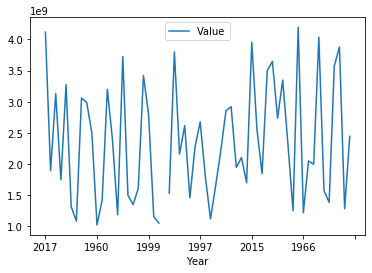

In [9]:
# import the charting library we need and set it to draw inline with the notebook
%matplotlib inline
# First, sort by Year to make sure we get everything in order
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
# inplace = True means it will sort and save to the df variable
df
# Here we filter the df["Country Name"] column only by values == "World"
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.line.html
df[df["Country Name"] == "World"].plot(x="Year", y="Value")

## 2.2.2 Tutorial - cleaning complex data

The spreadsheet you worked on in the first tutorial had much more complex problems than just being wide. It has merged cells that need to be cleaned up. Obviously, you could do this manually before importing into pandas, but let's have a go at fixing this programmatically.

Firstly, remember that this is what it looks like:

![Tutorial spreadsheet](images/tutorial-1-2.jpg)

In [10]:
import numpy as np
import pandas as pd

source = "data/lesson-spreadsheet/HDR 2007-2008 Table 03.xlsx"

df = pd.read_excel(source)
df.head(12)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Monitoring human development: enlarging people's choices …,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,3 Human and income poverty Developing countries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Probability at birth of not surviving to age 4...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Adult illiteracy rateb,†\n(% aged 15 and older...",...,HPI-1 rank minus income poverty rankc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,Human poverty index (H...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As with the previous example, you can see that the "real" header row doesn't begin until around row 7, and even then it appears spread out over multiple rows. Plus there are a range of different problems. See if you can spot all of them:

- Seemingly empty columns and rows (filled with nothing but null value `NaNs`)
- Special printing characters (like `\n`)
- References that probably don't belong in this spreadsheet

There will be more, but lets have a go at fixing the immediate problems.

In [11]:
# Rebase the header row
df = pd.read_excel(source, header=7)
# https://stackoverflow.com/a/51794989
# First remove all columns (axis=1) with no values
df = df.dropna(how="all", axis=1)
# Remove all rows (axis=0) with no values
df = df.dropna(how="all", axis=0).reset_index(drop=True)
df.head(6)

,Unnamed: 0,Unnamed: 1,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,NaN,NaN,NaN,NaN,Probability at birth of not surviving to age 4...,NaN,NaN,NaN,NaN,NaN,MDG,NaN,MDG,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Adult illiteracy rateb,†\n(% aged 15 and older...",NaN,Population not using an improved water source†...,NaN,Children under weight for age†\n(% under age 5...,NaN,Population below\n income poverty line\n(%),NaN,NaN,NaN,NaN,NaN,HPI-1 rank minus income poverty rankc
2,NaN,NaN,Human poverty index (H...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HDI rank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$1 a day \n1990-2005d,NaN,$2 a day \n1990-2005d,NaN,National poverty line 1990-2004d,NaN,NaN
4,NaN,NaN,Rank,NaN,Value \n (%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,HIGH HUMAN DEVELOPMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We could simply fix the columns, but lets get a list of the information that's there already and use that to guide the new names we need to include.

In [12]:
columns = []
for c in df.columns:
    # For each column, get the values in the first 5 rows
    # then keep all the strings (i.e. exclude if null) and append as a column
    columns.append([str(v) for v in df[c][:5] if pd.notnull(v)])
columns

[['HDI rank'],
 [],
 ['Human poverty index                         (HPI-1)', 'Rank'],
 [],
 ['Value \n (%)'],
 ['Probability at birth of not surviving to age 40a,†\n(% of cohort)\n2000-05'],
 [],
 ['Adult illiteracy rateb,†\n(% aged 15 and older)\n1995-2005 '],
 [],
 ['Population not using an improved water source†\n(%)\n2004'],
 [],
 ['MDG', 'Children under weight for age†\n(% under age 5)\n1996-2005d '],
 [],
 ['MDG',
  'Population below\n income poverty line\n(%)',
  '$1 a day \n1990-2005d'],
 [],
 ['$2 a day \n1990-2005d '],
 [],
 ['National poverty line           1990-2004d'],
 [],
 ['HPI-1 rank minus income poverty rankc']]

There's a few columns that appear to have no names. But those columns weren't deleted when we removed empty columns and rows, so there is information in them. When in doubt, open the source file and have a look. When you do, you'll notice that the first "empty" column actually contains the country names, and the remaining empty columns contain the individual references. This allows us to come up with a list of new column names:

In [13]:
columns = [
    "HDI rank",
    "Country",
    "Human poverty index (HPI-1) - Rank",
    "Reference 1",
    "Human poverty index (HPI-1) - Value (%)",
    "Probability at birth of not surviving to age 40 (% of cohort) 2000-05",
    "Reference 2",
    "Adult illiteracy rate (% aged 15 and older) 1995-2005",
    "Reference 3",
    "Population not using an improved water source (%) 2004",
    "Reference 4",
    "Children under weight for age (% under age 5) 1996-2005",
    "Reference 5",
    "Population below income poverty line (%) - $1 a day 1990-2005",
    "Reference 6",
    "Population below income poverty line (%) - $2 a day 1990-2005",   
    "Reference 7",
    "Population below income poverty line (%) - National poverty line 1990-2004",   
    "Reference 8",
    "HPI-1 rank minus income poverty rank"
]
# Reset the dataframe columns
df.columns = columns
# Remove the rows that contained the information we no longer need
# and reset the index
# np.arange(5) creates an array = [0, 1, 2, 3, 4, 5]
df = df.drop(np.arange(5), axis=0).reset_index(drop=True)
df.head()

,HDI rank,Country,Human poverty index (HPI-1) - Rank,Reference 1,Human poverty index (HPI-1) - Value (%),Probability at birth of not surviving to age 40 (% of cohort) 2000-05,Reference 2,Adult illiteracy rate (% aged 15 and older) 1995-2005,Reference 3,Population not using an improved water source (%) 2004,Reference 4,Children under weight for age (% under age 5) 1996-2005,Reference 5,Population below income poverty line (%) - $1 a day 1990-2005,Reference 6,Population below income poverty line (%) - $2 a day 1990-2005,Reference 7,Population below income poverty line (%) - National poverty line 1990-2004,Reference 8,HPI-1 rank minus income poverty rank
0,HIGH HUMAN DEVELOPMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21,"Hong Kong, China (SAR)",..,NaN,..,1.5,e,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..
2,25,Singapore,7,NaN,5.2,1.8,NaN,7.5,NaN,0,NaN,3,NaN,..,NaN,..,NaN,..,NaN,..
3,26,Korea (Republic of),..,NaN,..,2.5,NaN,1.0,NaN,8,NaN,..,NaN,<2,NaN,<2,NaN,..,NaN,..
4,28,Cyprus,..,NaN,..,2.4,NaN,3.2,NaN,0,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..


This file doesn't have a separate metadata file to accompany it. All the references and footnotes are literally at the bottom of the file. Have a look:

In [14]:
df.tail(30)

,HDI rank,Country,Human poverty index (HPI-1) - Rank,Reference 1,Human poverty index (HPI-1) - Value (%),Probability at birth of not surviving to age 40 (% of cohort) 2000-05,Reference 2,Adult illiteracy rate (% aged 15 and older) 1995-2005,Reference 3,Population not using an improved water source (%) 2004,Reference 4,Children under weight for age (% under age 5) 1996-2005,Reference 5,Population below income poverty line (%) - $1 a day 1990-2005,Reference 6,Population below income poverty line (%) - $2 a day 1990-2005,Reference 7,Population below income poverty line (%) - National poverty line 1990-2004,Reference 8,HPI-1 rank minus income poverty rank
127,176,Burkina Faso,106,NaN,55.8,26.5,NaN,76.4,NaN,39,NaN,38,NaN,27.2,NaN,71.8,NaN,46.4,NaN,23
128,177,Sierra Leone,102,NaN,51.7,45.6,NaN,65.2,NaN,43,NaN,27,NaN,57.0,e,74.5,e,70.2,NaN,4
129,NOTES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,† Denotes indicators used to calculate the hum...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,a. Data refer to the probability at birth of n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,SOURCES\nColumn 1: Determined on the basis of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,HPI-1 ranks for 108 developing countries and a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,1,Barbados,22,Turkey,NaN,NaN,45,Tunisia,NaN,68,Morocco,NaN,NaN,89,Angola,NaN,NaN,NaN,NaN,NaN
135,2,Uruguay,23,Brazil,NaN,NaN,46,Nicaragua,NaN,69,Sudan,NaN,NaN,90,Papua New Guinea,NaN,NaN,NaN,NaN,NaN
136,3,Chile,24,Thailand,NaN,NaN,47,Indonesia,NaN,70,Lao People's Democratic Republic,NaN,NaN,91,Zimbabwe,NaN,NaN,NaN,NaN,NaN


We need to delete this from the dataframe ___but___ we cannot lose this information. You should also create a metadata file containing this information to keep with your restructured data file, this way you have all the guidance a user may need, along with machine-readable data.

In [15]:
# Drop the rows from the bottom of the data we want to keep, to the end (defined as len(df))
df = df.drop(np.arange(126,len(df)), axis=0).reset_index(drop=True)

We have one other issue as well. There are three Human Development Index categories, arbitrarily defined as:

- `LOW HUMAN DEVELOPMENT` for `HDI ranks < 155`
- `MEDIUM HUMAN DEVELOPMENT` for `HDI ranks < 70`
- `HIGH HUMAN DEVELOPMENT` for everything else

We need to remove these rows (since they get in the way of the core data) and reassign them to columns.

In [16]:
hdi_categories = ["HIGH HUMAN DEVELOPMENT", "MEDIUM HUMAN DEVELOPMENT", "LOW HUMAN DEVELOPMENT"]
# Get rid of rows with the HDI categories
# https://stackoverflow.com/a/27360130 & https://stackoverflow.com/a/12098586
df = df.drop(df[df["HDI rank"].isin(hdi_categories)].index, axis=0).reset_index(drop=True)
# Reference for np.where https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html
# Think of this as being similar to an if-then statement : where(test is true, true-thing, false-thing)
# this can also be nested: where(test is true, true-thing, where(new-test is true, true-thing, false-thing))
df.loc[:, "HDI category"] = np.where(df["HDI rank"] < 155,
                                     "LOW HUMAN DEVELOPMENT",
                                     np.where(df["HDI rank"] < 70,
                                              "MEDIUM HUMAN DEVELOPMENT",
                                              "HIGH HUMAN DEVELOPMENT"
                                             )
                                    )
df.sort_values(by="HDI rank", inplace=True)
df.head()

,HDI rank,Country,Human poverty index (HPI-1) - Rank,Reference 1,Human poverty index (HPI-1) - Value (%),Probability at birth of not surviving to age 40 (% of cohort) 2000-05,Reference 2,Adult illiteracy rate (% aged 15 and older) 1995-2005,Reference 3,Population not using an improved water source (%) 2004,...,Children under weight for age (% under age 5) 1996-2005,Reference 5,Population below income poverty line (%) - $1 a day 1990-2005,Reference 6,Population below income poverty line (%) - $2 a day 1990-2005,Reference 7,Population below income poverty line (%) - National poverty line 1990-2004,Reference 8,HPI-1 rank minus income poverty rank,HDI category
0,21,"Hong Kong, China (SAR)",..,NaN,..,1.5,e,..,NaN,..,...,..,NaN,..,NaN,..,NaN,..,NaN,..,LOW HUMAN DEVELOPMENT
1,25,Singapore,7,NaN,5.2,1.8,NaN,7.5,NaN,0,...,3,NaN,..,NaN,..,NaN,..,NaN,..,LOW HUMAN DEVELOPMENT
2,26,Korea (Republic of),..,NaN,..,2.5,NaN,1.0,NaN,8,...,..,NaN,<2,NaN,<2,NaN,..,NaN,..,LOW HUMAN DEVELOPMENT
3,28,Cyprus,..,NaN,..,2.4,NaN,3.2,NaN,0,...,..,NaN,..,NaN,..,NaN,..,NaN,..,LOW HUMAN DEVELOPMENT
4,30,Brunei Darussalam,..,NaN,..,3.0,NaN,7.3,NaN,..,...,..,NaN,..,NaN,..,NaN,..,NaN,..,LOW HUMAN DEVELOPMENT


There is a lot more we can do to clean this spreadsheet, but this is a good start and teaches you a great deal about what you can do with pandas. When you're done, remember to save your dataframe as a `CSV` using `.to_csv` as you did in the earlier exercise.

---

## 2.2.3 Lesson tutorial

Using the same spreadsheet from [training data](data/lesson-spreadsheet/) you used in the first tutorial, restructure it according to the techniques and requirements presented in this lesson. Remember to create a metadata file along with your data file.

Please complete this tutorial before beginning the next lesson.